# Algoritmo de ordenamiento binario - BinarySort
![Descripción de la imagen](orden-2.png)


##### He codificado un algoritmo de ordenamiento al que he llamado "BinarySort" ya que esta inspirado en la busqueda binaria.
##### Este algoritmo pretende ordenar lista de numeros positivos y enteros(por ahora) con una eficiencia LG(n)
##### He utilizado estos parametros para las pruebas
- Tamaño de la lista a ordenar: varia de 1 a 10 millones
- Rango de valores: es decir la lista contiene numeros aleatorios desde 0 a N. N Tendra valores [10k,50k,100k,200k]
- Distribucion estadistica de los numeros de la lista: normal, bimoda, uniforme, sezgada a la izquierda, sezgada a la derecha y con muchos ceros



## Importamos las bibliotecas

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Cargamos la data ya ordenada

In [55]:
filename = 'data.csv'
df = pd.read_csv(filename)

### Verificamos que todas las pruebas hayan sido exitosas

In [56]:
count_true = df['ordered'].value_counts()[True]
if count_true == df.shape[0]:
    print("todos se ordenaron")
else:
    print("no se ordenaron todos")


todos se ordenaron


### Cargamos constantes necesarias y funciones

In [57]:
def format_number(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M' 
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'  
    else:
        return str(int(x)) 
colors = ['blue', 'green', 'orange']
color_map = {
    'binarySort': 'blue',
    'mergeSort': 'green',
    'quickSort': 'orange',
}


## Grafica de lineas donde expresamos el rendimiento de cada algoritmo

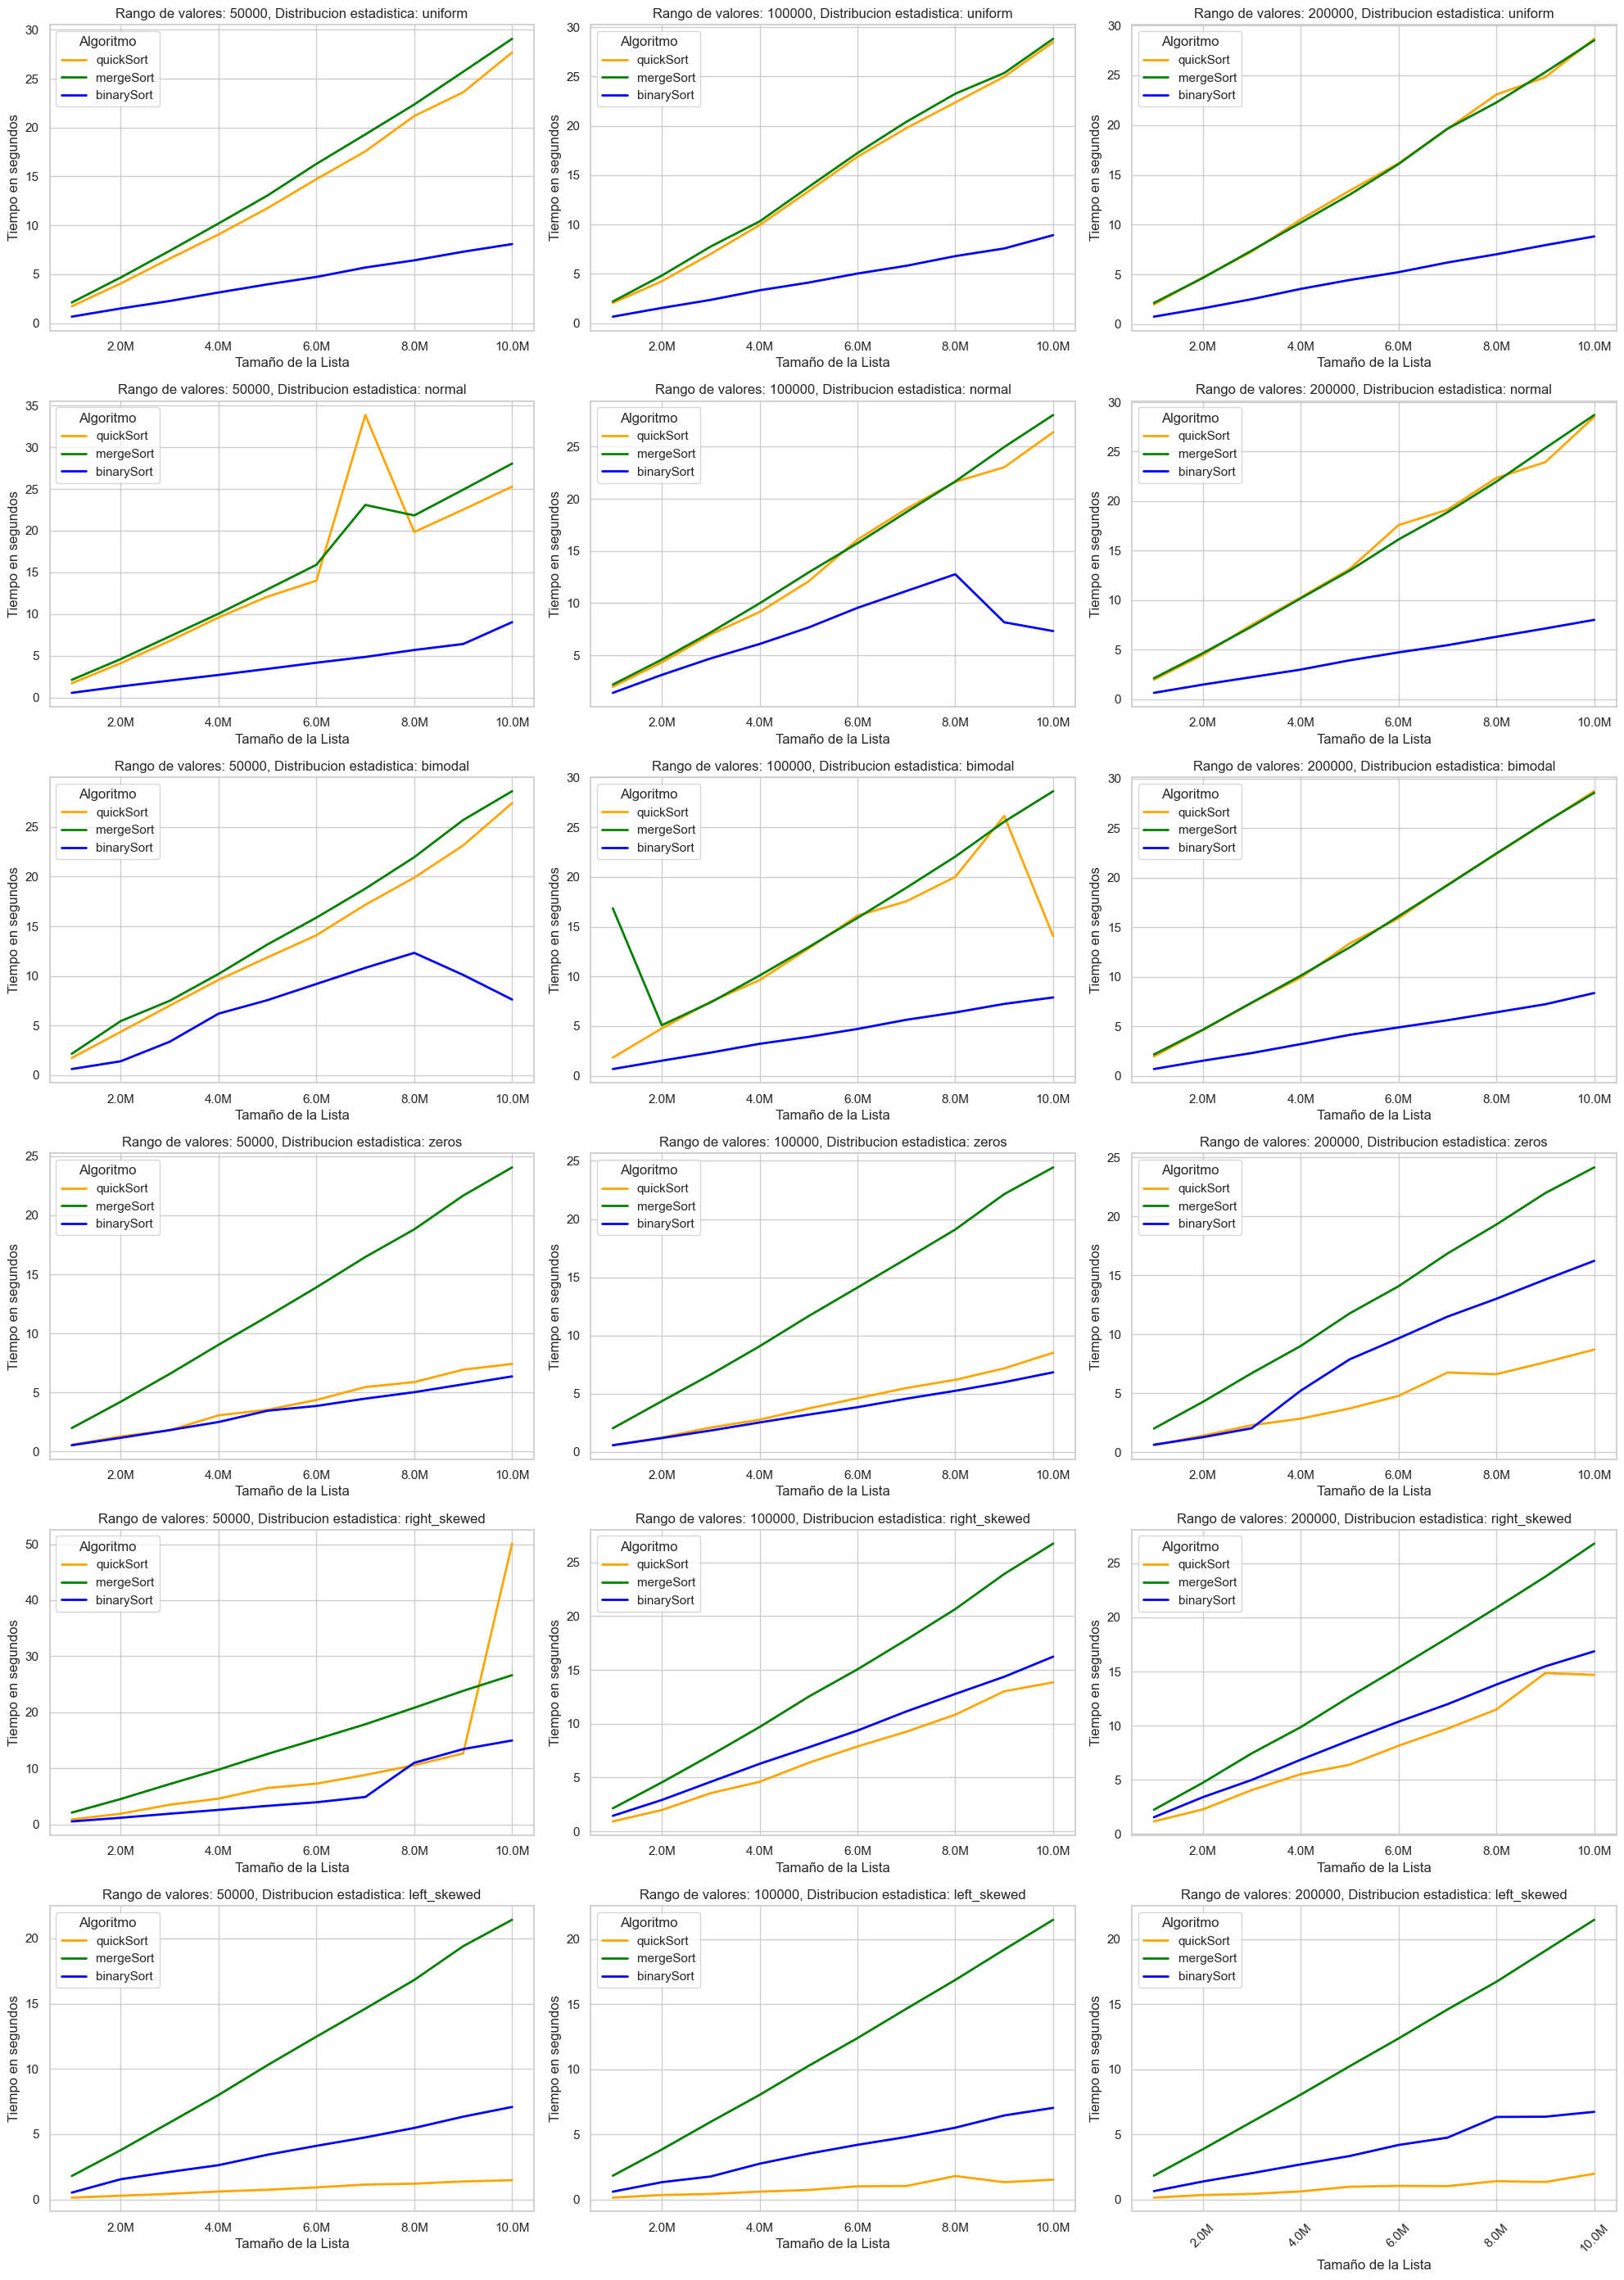

In [58]:
ranges = [50000, 100000, 200000]
distributions = ['uniform', 'normal', 'bimodal', 'zeros', 'right_skewed', 'left_skewed']

fig, axs = plt.subplots(6, 3, figsize=(20, 28))  

axs = axs.flatten()

ax_index = 0

for dist in distributions:
    for r in ranges:
        filtered_df = df[(df['range'] == r) & (df['distribution'] == dist)]
        
        ax = axs[ax_index]
        
        for method in filtered_df['method'].unique():
            subset = filtered_df[filtered_df['method'] == method]
            ax.plot(subset['size'], subset['time'], label=method,  color=color_map.get(method, 'black'), linewidth=2)

        
        ax.set_xlabel('Tamaño de la Lista')
        ax.set_ylabel('Tiempo en segundos')
        ax.set_title(f'Rango de valores: {r}, Distribucion estadistica: {dist}')
        ax.legend(title='Algoritmo')
        ax.grid(True)
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_number))
        plt.xticks(rotation=45)

        ax_index += 1

plt.tight_layout()
plt.show()



### Mapa de calor donde visualmente percibimos los puntos de mayor estres para los algoritmos

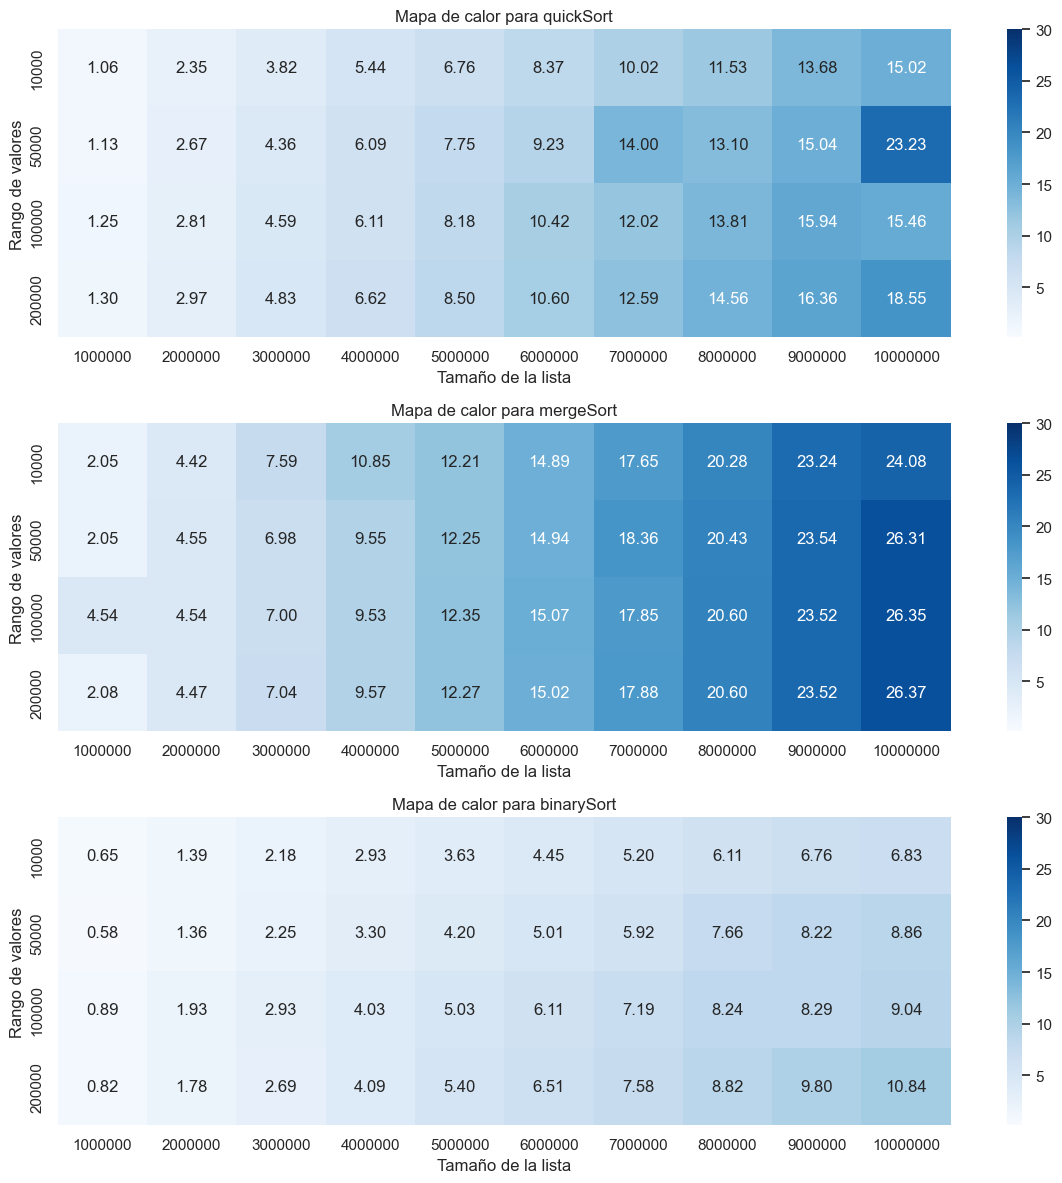

In [59]:

sns.set(style="whitegrid")


vmin = df['time'].min()
vmax = 30 #df['time'].max()

fig, axes = plt.subplots(3, 1, figsize=(12, 12))


methods = df['method'].unique()

axes = axes.flatten()

for i, method in enumerate(methods):
    df_method = df[df['method'] == method]
    
    pivot_table = df_method.pivot_table(index="range", columns="size", values="time")
    
    sns.heatmap(pivot_table, ax=axes[i], annot=True, fmt=".2f", cmap="Blues", vmin=vmin, vmax=vmax)
    axes[i].set_title(f"Mapa de calor para {method}")
    axes[i].set_xlabel("Tamaño de la lista")
    axes[i].set_ylabel("Rango de valores")

plt.tight_layout()
plt.show()


### Grafico de barras donde compararemos los 3 algoritmos

In [60]:
ranges = df["range"].unique()
distributions = df["distribution"].unique()
sizes = df["size"].unique()
quickSort = 0
mergeSort = 0
binarySort = 0

for ran in ranges:
    for dist in distributions:
        for si in sizes:
            temp = df[(df["range"] == ran) & (df["distribution"] == dist) & (df["size"] == si )]

            if temp.iloc[0]["time"] < temp.iloc[1]["time"] and temp.iloc[0]["time"] < temp.iloc[2]["time"]:
                method_with_min_time = temp.iloc[0]["method"]

            elif temp.iloc[1]["time"] < temp.iloc[0]["time"] and temp.iloc[1]["time"] < temp.iloc[2]["time"]:
                method_with_min_time =temp.iloc[1]["method"]

            elif temp.iloc[2]["time"] < temp.iloc[1]["time"] and temp.iloc[2]["time"] < temp.iloc[0]["time"] :
                method_with_min_time =temp.iloc[2]["method"]


            
            if method_with_min_time == 'quickSort':
                quickSort += 1
            if method_with_min_time == 'mergeSort':
                mergeSort += 1
            if method_with_min_time == 'binarySort':
                binarySort += 1


methods = [ 'binarySort', 'mergeSort', 'quickSort' ]
times = [binarySort, mergeSort, quickSort ] 

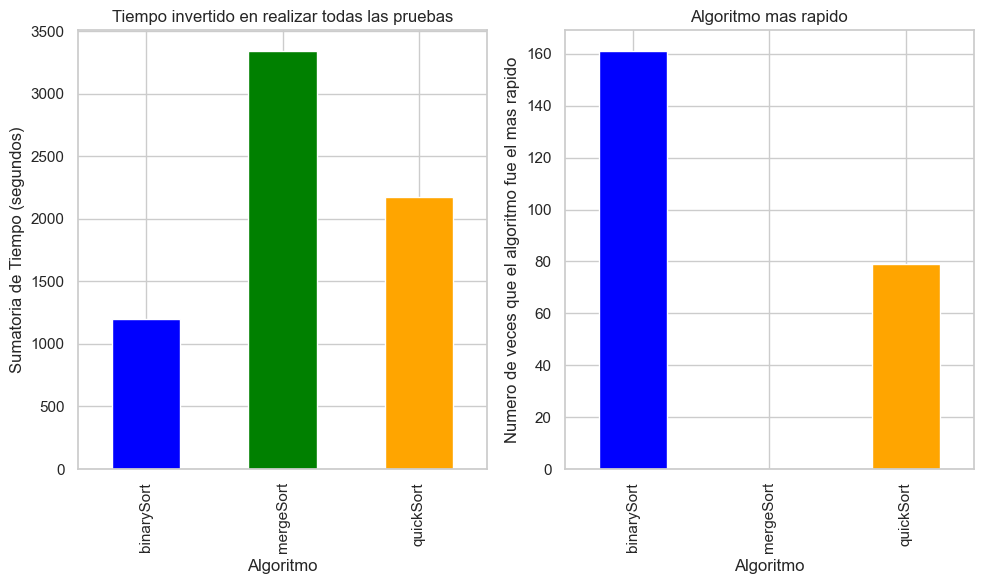

In [61]:

fastest_method_counts = pd.Series(times, index=methods)
total_time_per_method = df.groupby('method')['time'].sum()


fig, axes = plt.subplots(1, 2, figsize=(10, 6))  


total_time_per_method.plot(kind='bar', color=colors, ax=axes[0], title='Tiempo invertido en realizar todas las pruebas')
axes[0].set_xlabel('Algoritmo')
axes[0].set_ylabel('Sumatoria de Tiempo (segundos)')


fastest_method_counts.plot(kind='bar', color=colors, ax=axes[1], title='Algoritmo mas rapido')
axes[1].set_xlabel('Algoritmo')
axes[1].set_ylabel('Numero de veces que el algoritmo fue el mas rapido')

plt.tight_layout()

plt.show()

### Dados los resultados preliminares pareciera que el algoritmo de ordenamiento binario se comporta eficientemente en al menos el 60% de las ocasiones